<a href="https://colab.research.google.com/github/alaamer12/Documentations/blob/main/Youtube_Video_Transcript_Summarization_with_Hugging_Face_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q transformers

In [2]:
!pip install -q youtube_transcript_api

In [3]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi


In [32]:
youtube_video = "https://www.youtube.com/watch?v=U_Q1vqaJi34"

In [33]:
video_id = youtube_video.split("=")[1]

In [34]:
video_id

'U_Q1vqaJi34'

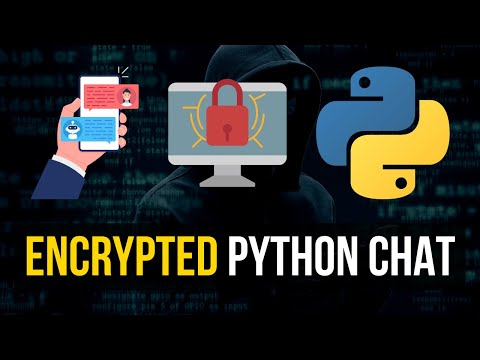

In [35]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [36]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)


In [37]:
transcript

[{'text': 'what is going on guys welcome back in',
  'start': 0.0,
  'duration': 3.3},
 {'text': "today's video we're going to learn how",
  'start': 2.1,
  'duration': 3.54},
 {'text': 'to build an encrypted chat in Python so',
  'start': 3.3,
  'duration': 5.36},
 {'text': 'let us get right into it', 'start': 5.64, 'duration': 3.02},
 {'text': '[Music]', 'start': 10.96, 'duration': 6.86},
 {'text': 'alright so I already have quite a lot of',
  'start': 15.96,
  'duration': 3.18},
 {'text': 'tutorials on this channel on how to',
  'start': 17.82,
  'duration': 4.379},
 {'text': 'build a chat in Python beat a TCP chat a',
  'start': 19.14,
  'duration': 6.54},
 {'text': 'UDP chat a TCP chat room a web chat and',
  'start': 22.199,
  'duration': 5.041},
 {'text': "flask and in today's video we're going",
  'start': 25.68,
  'duration': 3.66},
 {'text': 'to build an encrypted chat which means',
  'start': 27.24,
  'duration': 3.6},
 {'text': 'that the communication between the',
  'start

In [38]:

result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

17110


In [39]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [40]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

#print(summarized_text)

input text 
 what is going on guys welcome back in today's video we're going to learn how to build an encrypted chat in Python so let us get right into it [Music] alright so I already have quite a lot of tutorials on this channel on how to build a chat in Python beat a TCP chat a UDP chat a TCP chat room a web chat and flask and in today's video we're going to build an encrypted chat which means that the communication between the individual clients is going to be encrypted we will not send any clear text messages we will encrypt the messages at the sending client and they will be decrypted at the receiving client making it basically impossible for me as a third party to just listen to the network traffic and say hey this is the content of the message I can read it as well just because I'm listening to the network connection I can see what you guys are talking about this is not possible when the connection is encrypted and in fact I'm going to show you the difference between uh encrypti

Your max_length is set to 142, but your input_length is only 26. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=13)


Summarized text
 When we encrypt the messages for our clients there's no difference in experience but we are not able to just listen to the connection and see what they're talking about which is very good . As long as you keep the private key private it's basically impossible to unencrypt these messages and this is how you do that .
input text 
ideo for free other than that thank you much for watching see you next video and bye thank you foreign [Music]
Summarized text
 The video is a free version of ideo ideo for free . You can watch the video for free other than that . The video was shot in New York City, New York, and was shot at the end of the video . It is the first time the video has been shot in the U.S.


In [43]:
len(str(summarized_text))

6109

In [44]:
str(summarized_text)

'[" In today\'s video we\'re going to learn how to build an encrypted chat in Python . We will encrypt the messages at the sending client and they will be decrypted at the receiving client . This makes it basically impossible for a third party to just listen to the network traffic and say hey this is the content of the message I can read it .", " We\'re going to use Wireshark and listening to the network traffic in this case only on my machine . This can also be done in a network if you\'re a router or something you can see what package is being sent and you can extract the messages in cleared text unless they are encrypted . We\'re using the socket module the threading module for the connection and everything and we\'re using RSA for the encryption .", \' If I have a public key you can know  everyone can know it everyone can use this key to encrypt a message for me and this encrypted message can only be decrypted with my private key which hopefully only I know so the private key is al

In [49]:
string = ""
for text in summarized_text:
  string += text

In [50]:
with open("summary.txt", "w") as f:
  f.write(str(string))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')